<div style="text-align: left;background-color:#1D274F; font-family: Trebuchet MS; color:white; padding: 12px; line-height: 1.25; border-radius: 120px; margin-bottom: 0em; text-align: center; font-size: 65px; border-style: solid; border-width: 8px; animation: blinkBorder 2s infinite, fadeIn 2s ease, slideInFromLeft 1.5s ease;">
    A Storm of Code⚡ - Analyzing Hurricanes
</div>

<style>
    @keyframes slideInFromLeft {
        0% {
            transform: translateX(-100%);
            opacity: 0;
        }
        100% {
            transform: translateX(0);
            opacity: 1;
        }
    }

    @keyframes blinkBorder {
        0% {
            border-color: White
            ;
        }
        50% {
            border-color: #424949;
        }
        100% {
            border-color: #424949;
        }
    }

    @keyframes fadeIn {
        0% {
            color: #F0EDEE;
        }
        25% {
            color: #AAB7B8;
        }
        50% {
            color: #C9D4D8;
        }
        100% {
            color: #F0EDEE;
        }
    }
</style>

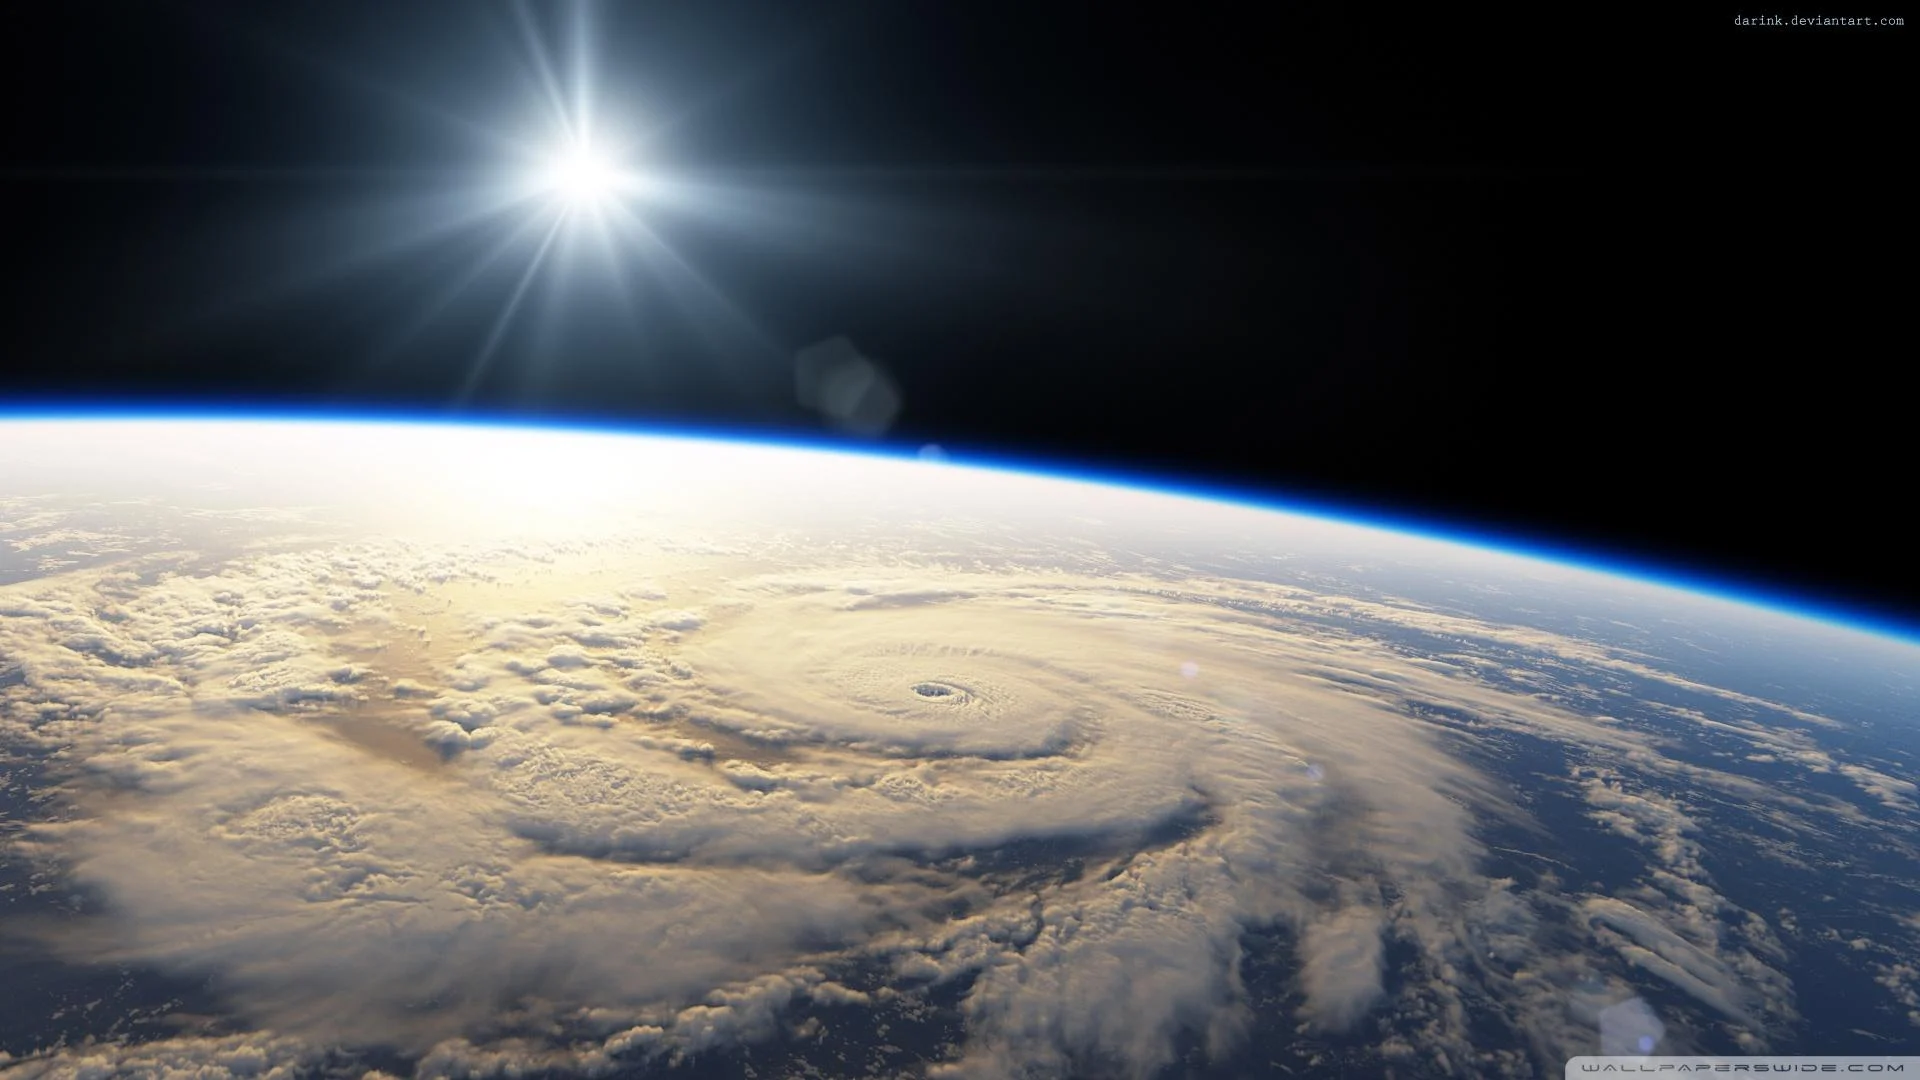

<h1><center style="color:#364582; font-family: 'Bold', cursive; font-size:60px;">Greetings, Notebook Awaits You</center></h1>

 > ## <span style="color:grey"><b>|</b></span><span style="color:darkblue"> <b>Introduction </b></span><span style="color:grey"><b>|</b></span> - `Greetings, in this notebook we will analyze hurricanes that affected North America from 2000 up to 2023. So, let's get started!`

# 1 <span style="color:#7b2cbf"></span><span style="color:grey ">||</span><span style="color:darkblue"> Setup </span>

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go 
from IPython.display import display, HTML
from colorama import Fore, Style
print('Setup Complete')

Setup Complete


In [2]:
data = pd.read_csv('/kaggle/input/north-american-hurricanes-from-2000/Hurricane Data.csv')

In [3]:
def print_boxed_blue_heading(heading):
    gradient = [Fore.RED, Fore.YELLOW, Fore.GREEN, Fore.CYAN, Fore.BLUE, Fore.MAGENTA]
    print("\n" + "=" * (len(heading) + 4))
    words = heading.split()
    for i, word in enumerate(words):
        if i == len(words) - 1:
            print(f"| {gradient[len(word) % len(gradient)] + word + Style.RESET_ALL} |")
        else:
            print(f"| {gradient[len(word) % len(gradient)] + word + Style.RESET_ALL}", end=" ")
    print("=" * (len(heading) + 4))

def print_error(message):
    raise ValueError(message)

def overview(df):
    try:

        # Display head of the dataset nicely
        print_boxed_blue_heading("The Head Of Dataset is:")
        display(HTML(df.head(5).to_html(index=False).replace('<table border="1" class="dataframe">', '<table style="border: 2px solid blue;">').replace('<td>', '<td style="color: skyblue;">')))
        print('\n')

        # Display tail of the dataset nicely
        print_boxed_blue_heading("The Tail Of Dataset is:")
        display(HTML(df.tail(5).to_html(index=False).replace('<table border="1" class="dataframe">', '<table style="border: 2px solid blue;">').replace('<td>', '<td style="color: skyblue;">')))
        print('\n')

        print_boxed_blue_heading("Shape Data:")
        print(f'The Shape of the Data is {df.shape} |')
        print(f'- 1.The No of Rows is {df.shape[0]} |')
        print(f'- 2.The No of Cols is {df.shape[1]}|')
        
        print('\n')
        
        print_boxed_blue_heading("Info Of Data:")
        df.info()

        # Describe both numerical and categorical data
        print_boxed_blue_heading("Numerical Summary of Data:")
        print(f"\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}The Numerical Summary of Data is:{Style.RESET_ALL}")
        display(df.describe().style.set_caption("Data Summary").set_table_styles([{'selector': 'caption', 'props': [('color', 'skyblue')]}]))

        Cat_cols = [col for col in df.columns if df[col].dtype == 'O']
        print_boxed_blue_heading("Categorical Columns of Data:")
        print(f'\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}The Categorical Columns of Data are :{Style.RESET_ALL} {Cat_cols}')

        N_cols = [col for col in df.columns if df[col].dtype == 'float']
        print_boxed_blue_heading("Numerical Columns of Data:")
        print(f'\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}The Numerical Columns of Data are :{Style.RESET_ALL} {N_cols}\n')

        print_boxed_blue_heading("Null Values in Data:")
        print(f'\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}The Null Values of Data are:{Style.RESET_ALL}\n{df.isnull().sum()}')

        print_boxed_blue_heading("Duplicates Check in Data:")
        if df.duplicated().any():
            print(f'\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}Duplicates exist in the dataset.{Style.RESET_ALL}')
        else:
            print(f'\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}No duplicates found in the dataset.{Style.RESET_ALL}')

    except Exception as e:
        print_error(e)

In [4]:
def scroll_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [5]:
def make_data_table(dataset, title):
    graph = dataset.select_dtypes(include=[np.number])
    info_graph = scroll_table(dataset, 'graph_data_2', title)
    display(HTML(info_graph))
    return make_data_table

# 2 <span style="color:#7b2cbf"></span><span style="color:grey ">||</span><span style="color:darkblue"> Viewing Data </span>

In [6]:
overview(data)


| The | Head | Of | Dataset | is: |


Year,Name,Category,Rain Inch.,Highest Wind Speed,Damage(USD),Fatalities,Affected Areas
2000,Debby,Category 1,28.00,85,737000,1,"Lesser Antilles, Puerto Rico, Hispaniola, Turks and Caicos Islands, Cuba, Jamaica"
2000,Gordon,Category 1,9.48,80,5100000,26,"Central America (particularly Belize), Yucatán Peninsula, Cuba, East Coast of the United States, Atlantic Canada"
2000,Helene,TS,9.56,70,16000000,2,"Lesser Antilles, Puerto Rico, Hispaniola, Jamaica, Cuba, Isle of Youth, Eastern United States, Atlantic Canada"
2000,Leslie,TS,17.50,45,950000000,3,"Cuba, Bahamas, Florida, Bermuda, Atlantic Canada, Europe"
2001,Allison,TS,40.00,60,9000000000,55,"Texas, Louisiana, Mississippi, Alabama, Georgia, Florida, South Carolina, North Carolina, Virginia, District of Columbia, Maryland, Delaware, Pennsylvania, New York, New Jersey, Rhode Island, New England, Atlantic Canada"





| The | Tail | Of | Dataset | is: |


Year,Name,Category,Rain Inch.,Highest Wind Speed,Damage(USD),Fatalities,Affected Areas
2022,Alex,TS,11.90,70,NaN,4,"Yucatán Peninsula, western Cuba, Florida, the Bahamas, Bermuda"
2022,Ian,Category 5,31.52,160,113000000000,161,"Trinidad and Tobago, Venezuela, Colombia, ABC islands, Jamaica, Cayman Islands, Cuba, Southeast United States (especially Florida and The Carolinas)"
2022,Nicole,Category 1,8.00,75,1000000000,11,"Dominican Republic, Puerto Rico, The Bahamas, Southeastern United States"
2023,Idalia,Category 4,5.50,130,3600000000,12,"Yucatán Peninsula, Cayman Islands, Western Cuba, Southeastern United States, Bermuda, Atlantic Canada"
2023,Lee,Category 5,6.50,165,50000000,4,"Bermuda, Northeastern United States, Eastern Canada"





| Shape | Data: |
The Shape of the Data is (125, 8) |
- 1.The No of Rows is 125 |
- 2.The No of Cols is 8|



| Info | Of | Data: |
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                125 non-null    int64  
 1   Name                125 non-null    object 
 2   Category            125 non-null    object 
 3   Rain Inch.          124 non-null    float64
 4   Highest Wind Speed  125 non-null    int64  
 5   Damage(USD)         111 non-null    object 
 6   Fatalities          125 non-null    int64  
 7   Affected Areas      125 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 7.9+ KB

| Numerical | Summary | of | Data: |

The Numerical Summary of Data is:


,Year,Rain Inch.,Highest Wind Speed,Fatalities
count,125.000000,124.000000,125.000000,125.000000
mean,2010.936000,11.318250,93.400000,55.176000
std,6.854177,8.550155,40.608874,279.067545
min,2000.000000,0.500000,40.000000,0.000000
25%,2005.000000,5.272500,60.000000,2.000000
50%,2010.000000,9.000000,75.000000,6.000000
75%,2017.000000,15.025000,130.000000,34.000000
max,2023.000000,41.650000,215.000000,3059.000000



| Categorical | Columns | of | Data: |

The Categorical Columns of Data are : ['Name', 'Category', 'Damage(USD)', 'Affected Areas']

| Numerical | Columns | of | Data: |

The Numerical Columns of Data are : ['Rain Inch.']


| Null | Values | in | Data: |

The Null Values of Data are:
Year                   0
Name                   0
Category               0
Rain Inch.             1
Highest Wind Speed     0
Damage(USD)           14
Fatalities             0
Affected Areas         0
dtype: int64

| Duplicates | Check | in | Data: |

No duplicates found in the dataset.


# 3 <span style="color:#7b2cbf"></span><span style="color:grey ">||</span><span style="color:darkblue"> Exploratory Data Analysis </span>

In [7]:
fig = px.histogram(data, x='Year', nbins=20, title='Amount of Hurricanes Each Year', marginal='box', color_discrete_sequence=['tan'])
fig.update_layout(yaxis_title='Count', bargap=0.1, plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

In [8]:
# Convert numerical categories to strings
data['Category'] = data['Category'].apply(lambda x: 'TS' if x == 'TS' else f'Category {x}')

# Create the histogram
fig = px.histogram(data, x='Category', title='Distribution of Hurricanes by Category', color_discrete_sequence=['white'])
fig.update_layout(yaxis_title='Count', bargap=0.1, plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

In [9]:
fig = px.histogram(data, x='Damage(USD)', title='Damage Amounts from Hurricanes', color_discrete_sequence=['white'])
fig.update_layout(yaxis_title='Count', bargap=0.1, plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

In [10]:
fig = px.histogram(data, x='Fatalities', title='Damage Amounts from Hurricanes', color_discrete_sequence=['white'])
fig.update_layout(yaxis_title='Count', bargap=0.1, plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

In [11]:
def extract_countries(df):
    # Split the 'Affected Areas' column into separate country names
    country_names = df['Affected Areas'].str.split(', ').explode()
    
    # Create a new DataFrame with the extracted country names
    country_df = pd.DataFrame({'Country': country_names})
    
    return country_df

In [12]:
new_df = extract_countries(data)

In [13]:
fig = px.histogram(new_df, x='Country', title='Areas Affected by Hurricanes', color_discrete_sequence=['white'])
fig.update_layout(yaxis_title='Count', bargap=0.1, plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

In [14]:
fig = px.histogram(data, x='Name', title='Distribution of Hurricane Names', color_discrete_sequence=['tan'])
fig.update_layout(yaxis_title='Count', bargap=0.1, plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

In [15]:
fig = px.histogram(data, x='Highest Wind Speed', title='Distribution of Wind Speeds', color_discrete_sequence=['white'])
fig.update_layout(yaxis_title='Count', bargap=0.1, plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

# 4 <span style="color:#7b2cbf"></span><span style="color:grey ">||</span><span style="color:darkblue"> Sorting Hurricanes </span>

In [16]:
def sort_hurricanes_by_crit(df, column_to_sort_by):
    # Convert 'Damage(USD)' column to numeric
    df['Damage(USD)'] = pd.to_numeric(df[column_to_sort_by], errors='coerce')
    
    # Sort the DataFrame by 'Damage(USD)' column in descending order
    sorted_df = df.sort_values(by='Damage(USD)', ascending=False)
    
    return sorted_df

In [17]:
USD_df = sort_hurricanes_by_crit(data, 'Damage(USD)')

make_data_table(USD_df, 'Hurricanes Sorted by USD Damage')

,Year,Name,Category,Rain Inch.,Highest Wind Speed,Damage(USD),Fatalities,Affected Areas
90,2017,Harvey,Category Category 4,40.000,130,1.250000e+11,107,"Windward Islands, Suriname, Guyana, Nicaragua, Honduras, Belize, Cayman Islands, Yucatán Peninsula, Southern and Eastern United States (especially Texas and Louisiana)"
121,2022,Ian,Category Category 5,31.520,160,1.130000e+11,161,"Trinidad and Tobago, Venezuela, Colombia, ABC islands, Jamaica, Cayman Islands, Cuba, Southeast United States (especially Florida and The Carolinas)"
92,2017,Maria,Category Category 5,4.330,175,9.160000e+10,3059,Southeastern United States and surrounding areas
91,2017,Irma,Category Category 5,21.660,180,7.720000e+10,134,"Cape Verde, Leeward Islands (especially Barbuda, Saint Barthélemy, Anguilla, Saint Martin and the Virgin Islands), Greater Antilles (Cuba and Puerto Rico), Turks and Caicos Islands, Jamaica, The Bahamas, Eastern United States (especially Florida)"
74,2012,Sandy,Category Category 3,3.000,115,6.870000e+10,233,"Greater Antilles, Bahamas, most of the eastern United States (especially the coastal Mid-Atlantic States), Bermuda, eastern Canada"
52,2008,Ike,Category Category 4,10.000,145,3.800000e+10,214,"Lucayan Archipelago, Hispanialo, Cuba, Cayman Islands, Texas, South Central United States, Great Lakes region, Canada"
36,2005,Wilma,Category Category 5,13.260,135,2.650000e+10,52,"Mexico, Florida, Bahamas"
98,2018,Michael,Category Category 5,11.620,160,2.550000e+10,74,"Central America, Yucatán Peninsula, Cayman Islands, Cuba, Southeastern United States (especially the Florida Panhandle and Georgia), Eastern United States, Eastern Canada, Iberian Peninsula"
97,2018,Florence,Category Category 4,30.000,150,2.420000e+10,54,"West Africa, Cape Verde, Bermuda, East Coast of the United States (especially the Carolinas), Atlantic Canada"
111,2020,Laura,Category Category 4,10.000,150,2.330000e+10,81,"Lesser Antilles, Greater Antilles, The Bahamas, Gulf Coast of the United States, Midwestern United States, Eastern United States"


<function __main__.make_data_table(dataset, title)>

In [18]:
Fatal_df = sort_hurricanes_by_crit(data, 'Fatalities')

make_data_table(Fatal_df, 'Hurricanes Sorted by Fatalities')

,Year,Name,Category,Rain Inch.,Highest Wind Speed,Damage(USD),Fatalities,Affected Areas
92,2017,Maria,Category Category 5,4.330,175,3059,3059,Southeastern United States and surrounding areas
51,2008,Hanna,Category Category 1,12.000,85,537,537,"Puerto Rico, Turks and Caicos Islands, Bahamas, Hispaniola, Eastern Seaboard, Atlantic Canada"
116,2020,Eta,Category Category 4,26.330,150,275,275,"San Andrés, Jamaica, Central America, Cayman Islands, Cuba, Bahamas, Southeastern United States"
74,2012,Sandy,Category Category 3,3.000,115,233,233,"Greater Antilles, Bahamas, most of the eastern United States (especially the coastal Mid-Atlantic States), Bermuda, eastern Canada"
44,2007,Noel,Category Category 1,17.230,80,222,222,"Leeward Islands, Puerto Rico, Hispaniola, Jamaica, Cuba, Turks and Caicos Islands, Bahamas, Florida, Eastern United States, Eastern Canada, Greenland, Western Europe"
52,2008,Ike,Category Category 4,10.000,145,214,214,"Lucayan Archipelago, Hispanialo, Cuba, Cayman Islands, Texas, South Central United States, Great Lakes region, Canada"
121,2022,Ian,Category Category 5,31.520,160,161,161,"Trinidad and Tobago, Venezuela, Colombia, ABC islands, Jamaica, Cayman Islands, Cuba, Southeast United States (especially Florida and The Carolinas)"
50,2008,Gustav,Category Category 4,10.750,155,153,153,"Lesser Antilles, Greater Antilles, United States Gulf Coast, Oklahoma, Arkansas, Tennessee, Missouri, Illinois, Michigan"
91,2017,Irma,Category Category 5,21.660,180,134,134,"Cape Verde, Leeward Islands (especially Barbuda, Saint Barthélemy, Anguilla, Saint Martin and the Virgin Islands), Greater Antilles (Cuba and Puerto Rico), Turks and Caicos Islands, Jamaica, The Bahamas, Eastern United States (especially Florida)"
34,2005,Rita,Category Category 5,5.040,58,120,120,"Hispaniola, Turks and Caicos Islands, Bahamas, Cuba, Florida, Georgia, Mississippi, Louisiana, Texas, Oklahoma, Arkansas, Missouri, Tennessee, Kentucky, Illinois, Great Lakes region"


<function __main__.make_data_table(dataset, title)>

# 5 <span style="color:#7b2cbf"></span><span style="color:grey ">||</span><span style="color:darkblue"> Generating Outputs </span>

In [19]:
USD_df.to_csv('Sorted by Deaths.csv', index = False)
Fatal_df.to_csv('Sorted by USD.csv', index = False)
print('Outputs Generated Successfully')

Outputs Generated Successfully


 > ## <span style="color:grey"><b>|</b></span><span style="color:darkblue"> <b>Conclusion </b></span><span style="color:grey"><b>|</b></span> - `I hope you liked this notebook and that you learned something new from it.`

### <h3 style="background-color:#1D274F;color:white;text-align: center;padding-top: 10px;padding-bottom: 10px;border-radius: 20px 100px;"><strong><centre>Please Upvote👍 And Fork🍴 God Bless You🙏 </centre></strong></h3>